In [2]:
import numpy as np
import pandas as pd

In [3]:
import os 
import sys

# count the number of images in the directory
image_dir = "../data/images/pixilart/"
image_files = os.listdir(image_dir)
num_images = len(image_files)
print("Number of images: ", num_images)


Number of images:  41716


In [4]:
import csv

csv_file = "../data/pixilart.csv"

with open(csv_file, 'r') as lines:
    for l in csv.reader(lines, quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL, skipinitialspace=True):
        if len(l) != 9:
            print("Error: ", l)

In [5]:


df = pd.read_csv(csv_file)

df.head()

,index,column_count,row_count,pixel_size,title,description,likes,comments,url
0,2,28,16,39,A beautiful house!,Such a nice house.,1236,350,https://art.pixilart.com/2.png
1,3,28,16,39,Hello Kitty,NaN,24,24,https://art.pixilart.com/3.png
2,4,28,16,39,Dragon,NaN,18,7,https://art.pixilart.com/4.png
3,5,28,16,39,Two Players!,NaN,21,11,https://art.pixilart.com/5.png
4,6,42,24,26,Link,NaN,12,4,https://art.pixilart.com/9ccb717aab.png


In [6]:
indices = df['index'].values

images_that_do_not_exist = []

# let's check if all images exist
for i in indices:
    image_name = str(i) + ".png"
    image_path = os.path.join(image_dir, image_name)
    if not os.path.exists(image_path):
        print("Image does not exist: ", image_path)
        images_that_do_not_exist.append(i)

Image does not exist:  ../data/images/pixilart/330.png
Image does not exist:  ../data/images/pixilart/51139.png


In [7]:
df = df[~df['index'].isin(images_that_do_not_exist)]
df.head()

,index,column_count,row_count,pixel_size,title,description,likes,comments,url
0,2,28,16,39,A beautiful house!,Such a nice house.,1236,350,https://art.pixilart.com/2.png
1,3,28,16,39,Hello Kitty,NaN,24,24,https://art.pixilart.com/3.png
2,4,28,16,39,Dragon,NaN,18,7,https://art.pixilart.com/4.png
3,5,28,16,39,Two Players!,NaN,21,11,https://art.pixilart.com/5.png
4,6,42,24,26,Link,NaN,12,4,https://art.pixilart.com/9ccb717aab.png


In [8]:
print(df['row_count'].min())
print(df['row_count'].max())
print(df['column_count'].min())
print(df['column_count'].max())

16
192
28
256


Width:  1092  Height:  624
Row count:  16  Column count:  28
Calculated Width:  1092  Calculated Height:  624


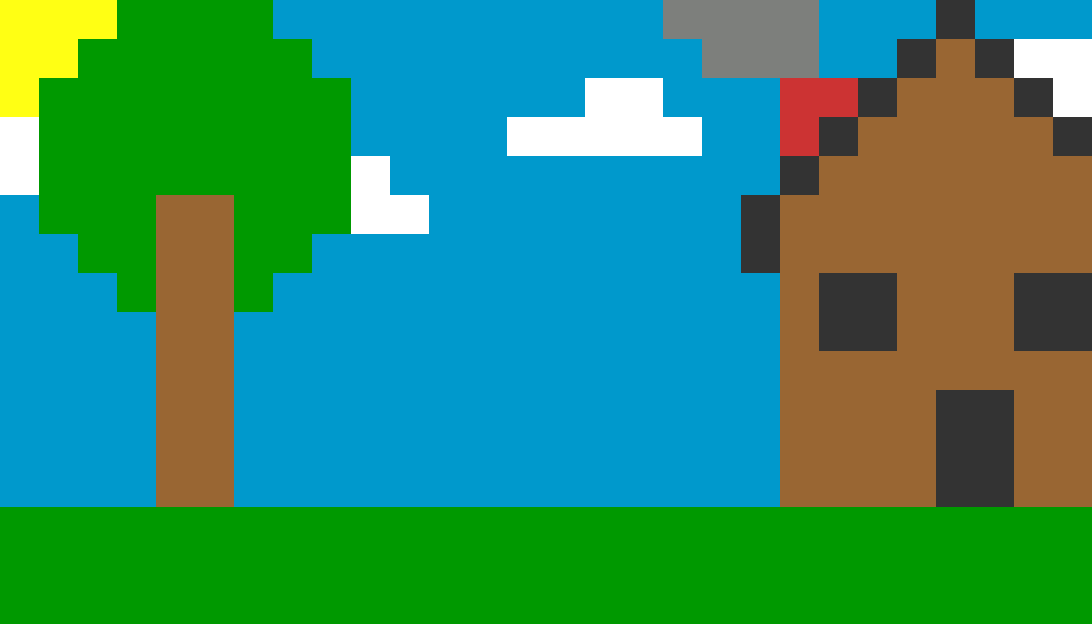

In [9]:
from PIL import Image

# let us see one image
# get first row of the dataframe
first_row = df.iloc[0]
sample = first_row.to_dict()



image_name = str(sample['index']) + ".png"
image_path = os.path.join(image_dir, image_name)

Image.open(image_path)

# width and height of the image
w, h = Image.open(image_path).size

r_count, c_count = sample['row_count'], sample['column_count']
grid_size = sample['pixel_size']
print("Width: ", w, " Height: ", h)
print("Row count: ", r_count, " Column count: ", c_count)
print("Calculated Width: ", c_count * grid_size, " Calculated Height: ", r_count * grid_size)

# show image
Image.open(image_path)

In [10]:


# get the counts of each row count unique value
row_count_counts = df['row_count'].value_counts()
print(row_count_counts)
column_count_list = df['column_count'].value_counts()
print(column_count_list)


row_count
144    40475
53       400
89       301
33       257
16       147
24       135
192        1
Name: count, dtype: int64
column_count
256    40475
91       400
156      301
56       257
28       147
42       135
192        1
Name: count, dtype: int64


In [11]:
# resize image
image = Image.open(image_path).resize((c_count, r_count))

# make rgb array
rgb = image.convert('RGB')
rgb_arr = np.array(rgb)
print("Shape of rgb array: ", rgb_arr.shape)

Shape of rgb array:  (16, 28, 3)


In [12]:
# rotate array by 90 degrees
rgb_arr = np.rot90(rgb_arr, 3)
print("Shape of rgb array: ", rgb_arr.shape)

print(rgb_arr[2:5].shape)
unique_values = np.unique(rgb_arr.reshape(-1, rgb_arr.shape[2]), axis=0)
print("Unique values: ", unique_values)

Shape of rgb array:  (28, 16, 3)
(3, 16, 3)
Unique values:  [[  0 153   0]
 [  0 153 204]
 [ 51  51  51]
 [125 127 124]
 [153 102  51]
 [204  51  51]
 [255 255  20]
 [255 255 255]]


In [13]:
def crop_image(from_x, to_x, from_y, to_y, image_arr):
    return image_arr[from_y:to_y, from_x:to_x]

def get_unique_colors(image_arr):
    unique_values = np.unique(image_arr.reshape(-1, image_arr.shape[2]), axis=0)
    return unique_values

cropped = crop_image(0, 3, 0, 3, rgb_arr)
print(cropped.shape)

unique_values = get_unique_colors(cropped)
print(unique_values)

(3, 3, 3)
[[  0 153   0]]


In [14]:
# we need square image size from 16x16 to 256x256
# we need a model that checks the grid size of the inputted image

total_classes = 256 - 16 + 1
print("Total classes: ", total_classes)

Total classes:  241


In [15]:
grid_size = 16


In [16]:
# sort the dataframe with row count and column count
df = df.sort_values(by=['row_count', 'column_count'])
df.head()

,index,column_count,row_count,pixel_size,title,description,likes,comments,url
0,2,28,16,39,A beautiful house!,Such a nice house.,1236,350,https://art.pixilart.com/2.png
1,3,28,16,39,Hello Kitty,NaN,24,24,https://art.pixilart.com/3.png
2,4,28,16,39,Dragon,NaN,18,7,https://art.pixilart.com/4.png
3,5,28,16,39,Two Players!,NaN,21,11,https://art.pixilart.com/5.png
5,7,28,16,39,Luigi,NaN,10,5,https://art.pixilart.com/c765747aef.png


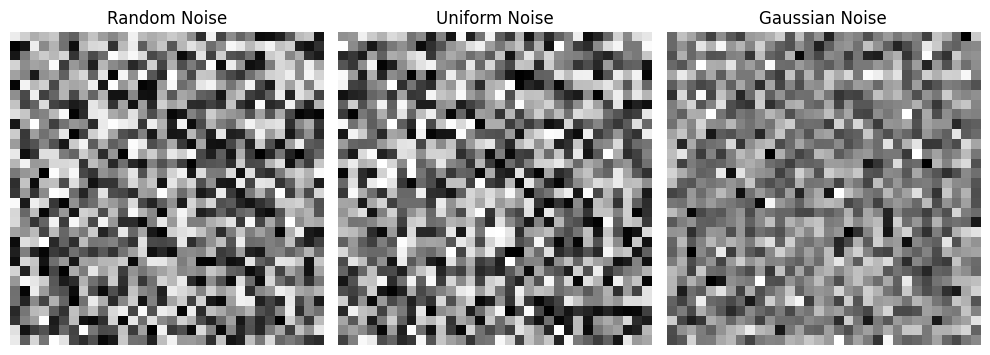

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the image
width, height = 32, 32

# Generate random noise
random_noise = np.random.rand(height, width) * 255

# Generate uniform noise
uniform_noise = np.random.randint(0, 256, (height, width))

# Generate Gaussian noise
gaussian_noise = np.random.normal(128, 50, (height, width))
gaussian_noise = np.clip(gaussian_noise, 0, 255)  # Clip values outside 0-255 range

# Display the different noise patterns
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.title('Random Noise')
plt.imshow(random_noise, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Uniform Noise')
plt.imshow(uniform_noise, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Gaussian Noise')
plt.imshow(gaussian_noise, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Random pixels to fill:  594
(256, 256)


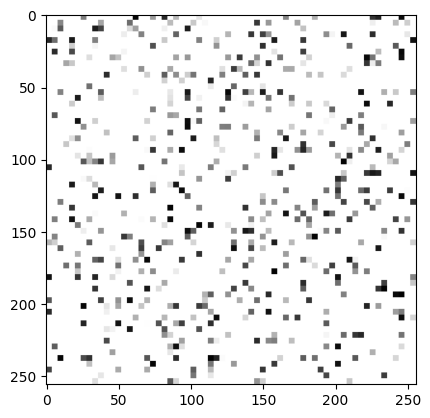

In [18]:
import matplotlib.pyplot as plt

def create_image(grid_size):
    total_pixels = grid_size * grid_size
    # random fill pixels amount of pixels
    random_pixels_to_fill = np.random.randint(2, total_pixels-2)
    print("Random pixels to fill: ", random_pixels_to_fill)
    random_row_indices = np.random.randint(0, grid_size, random_pixels_to_fill)
    random_column_indices = np.random.randint(0, grid_size, random_pixels_to_fill)
    random_indces = np.vstack((random_row_indices, random_column_indices)).T
    black_image_arr = np.zeros((grid_size, grid_size))
    black_image_arr = black_image_arr + 256
    black_image_arr[random_indces[:,0], random_indces[:,1]] = np.random.randint(2, 256, random_pixels_to_fill)
    # create black and white image from array
    image = Image.fromarray(black_image_arr)
    image = image.resize((256, 256), Image.NEAREST)
    print(image.size)
    # image show in jupyter notebook
    plt.imshow(image)
    # image.show()
    # print(black_image_arr)
    
create_image(64)

    

In [19]:
SIMGLE_IMGAE_MAX_USAGE = 20

def iterate_image(image_name, window_size=16):
    global df
    global image_dir
    image_loc = os.path.join(image_dir, str(image_name) + ".png")
    row_count = df[df['index'] == image_name]['row_count'].values[0]
    column_count = df[df['index'] == image_name]['column_count'].values[0]
    grid_size = df[df['index'] == image_name]['pixel_size'].values[0]
    
    image = Image.open(image_loc).resize((column_count, row_count))
    rgb = image.convert('RGB')
    rgb_arr = np.array(rgb)
    
    for i in range(0, row_count):
        for j in range(0, column_count):
            # size exceeds the image size
            if j + window_size > column_count or i + window_size > row_count:
                continue
            cropped = crop_image(j, j + window_size, i, i + window_size, rgb_arr)
            unique_values = get_unique_colors(cropped)
            if len(unique_values) > 1:
                print("Image: ", image_name, " Row: ", i, " Column: ", j, " Unique values: ", unique_values)
                return False
    

In [83]:
def create_black_white_image(grids, size):
    # total_pixels = grid_size * grid_size
    data_arr = []
    # random_mask_range = sorted(random_mask_range)
    for grid in grids:
        gaussian_noise = np.random.normal(128, 50, (grid, grid))
        gaussian_noise = np.clip(gaussian_noise, 0, 255)  # Clip values outside 0-255 range
        # make mask_range pixels white
        random_mask_range1 = np.random.randint(0, grid_size, 2)
        random_mask_range1 = sorted(random_mask_range1)
        random_mask_range2 = np.random.randint(0, grid_size, 2)
        random_mask_range2 = sorted(random_mask_range2)
        gaussian_noise[random_mask_range1[0]:random_mask_range1[1], random_mask_range1[0]:random_mask_range1[1]] = 255
        gaussian_noise[random_mask_range2[0]:random_mask_range2[1], random_mask_range2[0]:random_mask_range2[1]] = 255
        data_arr.append(gaussian_noise)
    
    img_arr = []
    for data in data_arr:
        image = Image.fromarray(data)
        image = image.resize((size, size), Image.NEAREST)
        image = np.array(image)
        img_arr.append(image)
    
    return img_arr
    

In [84]:
# # we are going to create 1000 images for grid size 8 to 256
# # we will create 1000 images for each grid size
# # create npz file for all the images with the grid size as the name of the collection

# images = []
# labels = []

# for i in range(8, 257):
#     print("Creating images for grid size: ", i)
#     img_arr = create_black_white_image(i, 256, 200)
#     images = images + img_arr
#     labels = labels + [i] * len(img_arr)
    
# np.savez_compressed("../data/black_white_images.npz", images=images, labels=labels)

In [85]:
arr = np.array(create_black_white_image([16, 32], 256))
print(arr.shape)

# arr as an understandable batch 4, 1, 256, 256
arr = np.expand_dims(arr, axis=1)
print(arr.shape)

(2, 256, 256)
(2, 1, 256, 256)


In [86]:
print(arr[0][0][0].shape)

(256,)


In [87]:
import torch 
import torch.nn as nn
import torch.optim as optim

# Define the CNN model for 256x256 input size
class GridSizeClassifier(nn.Module):
    def __init__(self, num_classes):
        super(GridSizeClassifier, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Adjust input size based on your image dimensions
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  # num_classes is the number of grid sizes to classify

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(-1, 32 * 64 * 64)  # Flatten the output for fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [88]:
test = torch.randn(4,1,2,2)


print(len(test))


# batch of 4 images
test = torch.randn(4,1,256,256)
print(test.shape)



4
torch.Size([4, 1, 256, 256])


In [89]:
from torchviz import make_dot

max_grid = 256
min_grid = 8
num_classes = max_grid - min_grid + 1
model = GridSizeClassifier(num_classes)

# graph = make_dot(model(torch.randn(4, 1, 256, 256)), params=dict(model.named_parameters()))
# graph.render('grid_size_classifier', view=True)

# graph.view()

output = model(test)
print(output.shape)


print(output)


torch.Size([4, 249])
tensor([[ 1.3254e-01,  6.0248e-02, -1.1691e-01,  4.1742e-02, -1.4367e-01,
          1.0083e-01,  7.7947e-02, -4.3070e-02,  9.2829e-02, -3.3497e-02,
          1.5619e-02, -8.9840e-02,  2.6539e-02,  6.5353e-02, -1.3203e-02,
         -2.1573e-01, -1.0208e-01, -1.4239e-01, -1.1373e-01,  9.2700e-02,
          6.9682e-02, -9.1389e-02, -1.0288e-01,  2.9772e-03, -5.3160e-02,
          7.2092e-02,  2.3660e-02,  8.4313e-02,  2.4421e-03,  1.4756e-01,
          1.1068e-02, -7.9580e-02,  2.0998e-02, -5.1605e-02,  8.1518e-02,
         -4.9099e-02, -3.0226e-02,  9.7553e-03, -5.4384e-02,  6.1124e-02,
          5.5690e-02, -6.4931e-02, -1.3138e-01, -1.4494e-01,  1.9221e-02,
          4.9088e-02,  4.6963e-02,  1.7275e-02,  2.3537e-02,  1.2160e-01,
         -3.2173e-02, -3.4790e-02, -7.2163e-02, -2.9655e-02,  5.4373e-02,
         -6.4602e-02,  1.5460e-01, -4.6588e-02, -1.4539e-01,  3.0087e-02,
          4.6957e-02, -2.2917e-02, -2.6850e-02, -2.9223e-02, -9.5868e-02,
         -6.9410e

In [93]:
batch = create_black_white_image([16], 256)

print(len(batch))


1


In [107]:
num_epochs = 5

batch_size = 4


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

number_of_images = 50 * num_classes

for epoch in range(num_epochs):
    running_loss = 0.0
    labels = np.array([x % num_classes + min_grid for x in range(0, number_of_images)])
    # shuffle the labels
    np.random.shuffle(labels)
    # print(labels)
    # count occurence of each label
    # label_counts = np.unique(labels, return_counts=True)
    # print max occurence
    # max_occurence = np.max(label_counts[1])
    
    # split labels into batches
    batches = [np.array(labels[i:i+batch_size]) for i in range(0, len(labels), batch_size)]
    
    # print("Number of batches: ", len(batches))
    # print(batches[-2])
    # break
    # print(label_batches.shape)
    for label_sample in batches:
        if (len(label_sample) != batch_size):
            continue
        input_data = np.array(create_black_white_image(label_sample, 256))
        
        target_one_hot = np.zeros((batch_size, num_classes))
        for i in range(len(label_sample)):
            target_one_hot[i][label_sample[i] - min_grid] = 1
        
        # convert to tensor
        input_data = torch.from_numpy(input_data).float().unsqueeze(1)
        target_labels = torch.from_numpy(target_one_hot).float()
        
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = model(input_data)
        loss = criterion(outputs, target_labels)
        loss.backward()
        optimizer.step()
    
        
        # print statistics
        running_loss += loss.item()
    
    # test the model
    # get the test batch
    test_count = 100
    accuracy = 0
    for i in range(test_count):
        test_grid_size = np.random.randint(min_grid, max_grid + 1)
        test_batch = create_black_white_image([test_grid_size], 256)
        test_batch = np.array(test_batch)
        test_batch = torch.from_numpy(test_batch).float().unsqueeze(1)
        # get the output
        output = model(test_batch)
        # get the prediction
        _, predicted = torch.max(output, 1)
        # Get accuracy of the model
        if predicted.item() + min_grid == test_grid_size:
            accuracy += 1

        
    print("Accuracy: ", accuracy / test_count)
    
    average_loss = running_loss / (number_of_images)
    print("Epoch: ", epoch, " Loss: ", average_loss)

Accuracy:  0.94
Epoch:  0  Loss:  0.1364911076743385
Accuracy:  0.93
Epoch:  1  Loss:  0.11743578915986298
Accuracy:  0.95
Epoch:  2  Loss:  0.14232319222744366
Accuracy:  0.8
Epoch:  3  Loss:  0.12696363251947368
Accuracy:  0.92
Epoch:  4  Loss:  0.11689697592983088


In [109]:
# save model 
torch.save(model.state_dict(), "../models/grid_size_classifier.pth")